# Cálculo de Bm em função de Hm
Este notebook realiza o cálculo de relutâncias e plota $B_m$ em função de $H_m$ com fórmulas visíveis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math

## 1. Parâmetros geométricos e físicos

In [ ]:
# Constantes geométricas (convertidas para metros)
lm = 3e-3       # metros
h = 1e-2        # metros
g = 1e-3        # metros
R1 = 2.1e-2       # metros
Rx = 2.1e-2     # metros
R2 = 4.0e-2    # metros
R3= 4.5e-2       # metros

# Permeabilidade do vácuo
u0 = 4 * np.pi * 10**(-7)  # H/m
u = u0  # assumindo vácuo

## 2. Áreas dos entreferros

In [ ]:
Ag1 = 2 * np.pi * (R1 + g/2) * h
Ag2 = np.pi * (Rx)**2
Am = np.pi*R3**2 - np.pi*R2**2
# Cálculo da indutância
display(Math(f"A_{{g1}} = 2\\pi(R_1 + \\frac{{g}}{2}) \\cdot h = {Ag1:.2e} \\, m^2"))
display(Math(f"A_{{g2}} = \\pi R_2^2 = {Ag2:.2e} \\, m^2"))
display(Math(f"A_{{m}} = \\pi(R_3^2 - R_2^2) = {Am:.2e} \\, m^2"))

## 3. Relutâncias

In [ ]:
x_val = 1e-3  # metros
Rg1 = g / (u * Ag1)
Rg2 = x_val / (u * Ag2)

display(Math(f"R_{{g1}} = \\frac{{g}}{{\\mu A_{{g1}}}} = {Rg1:.2e} \\, A/Wb"))
display(Math(f"R_{{g2}} = \\frac{{x}}{{\\mu A_{{g2}}}} = {Rg2:.2e} \\, A/Wb"))

## 4. Cálculo de $B_m(H_m)$

In [ ]:
Am_val = Am # m²
Rg_total = Rg1 + Rg2
coef = (-lm) / (Am_val * Rg_total)

display(Math(
    f"B_m(H_m) = \\left( \\frac{{-l_m}}{{A_m(R_{{g1}} + R_{{g2}})}} \\right) H_m = {coef:.2e} \\cdot H_m"
))

## 5. Plotagem de $B_m$ vs $H_m$

In [ ]:
Hm_vals = np.linspace(-1000, 0, 500)
Bm_vals = coef * Hm_vals * 1000

plt.figure(figsize=(8, 5))
plt.plot(Hm_vals, Bm_vals, label=r"$B_m(H_m)$")
plt.xlabel(r"$H_m \, (A/m)$")
plt.ylabel(r"$B_m \, (T)$")
plt.title("Curva Bm vs Hm")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

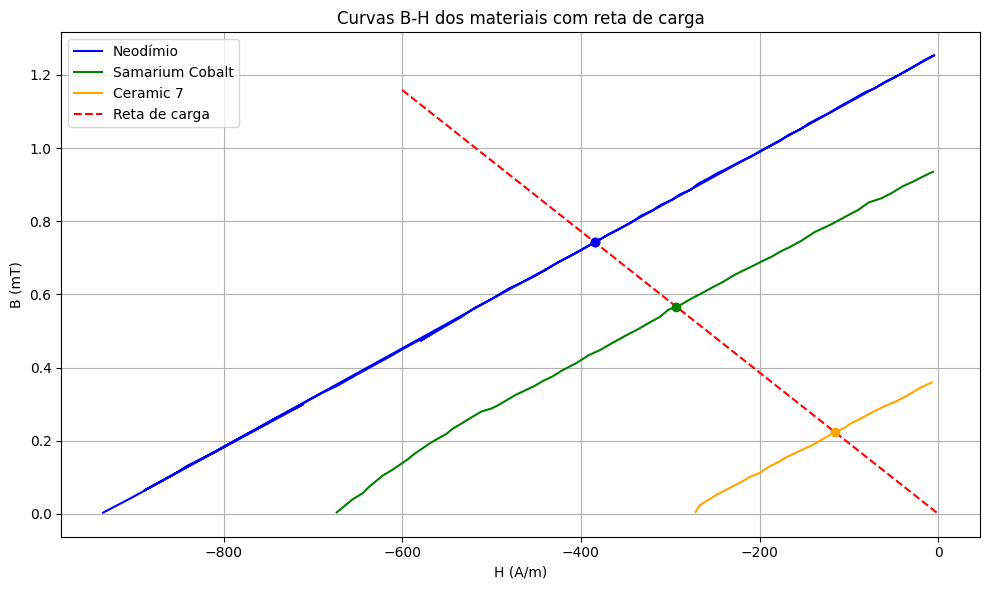

Interseções Neodímio:


,H_int (kA/m),B_int (T)
0,-384.326921,0.742219
1,-384.451244,0.742459


Interseções Samarium:


,H_int (kA/m),B_int (T)
0,-293.417504,0.566653


Interseções Ceramic:


,H_int (kA/m),B_int (T)
0,-115.680314,0.223404


0.7422186880876787
-384326.9207939185
Neodímio:      μ = -1.93e-06 H/m,   μ_r = -1.5
0.5666528751390411
-293417.5037040861
Samarium:      μ = -1.93e-06 H/m,   μ_r = -1.5


In [30]:
# === 6. Comparação com dados reais do material (com H em A/m) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregando os dados do material Neodímio
df_neod = pd.read_csv("neodIronBo.csv", sep=';', header=None, names=["H_data", "B_data"])
df_neod["H_data"] = df_neod["H_data"].str.replace(",", ".").astype(float)
df_neod["B_data"] = df_neod["B_data"].str.replace(",", ".").astype(float)

# Carregando os dados do material Samarium Cobalt
df_samarium = pd.read_csv("samariumCobalt.csv", sep=';', header=None, names=["H_data", "B_data"])
df_samarium["H_data"] = df_samarium["H_data"].str.replace(",", ".").astype(float)
df_samarium["B_data"] = df_samarium["B_data"].str.replace(",", ".").astype(float)

# Carregando os dados do material Ceramic 7
df_ceramic = pd.read_csv("ceramic7.csv", sep=';', header=None, names=["H_data", "B_data"])
df_ceramic["H_data"] = df_ceramic["H_data"].str.replace(",", ".").astype(float)
df_ceramic["B_data"] = df_ceramic["B_data"].str.replace(",", ".").astype(float)

# Geração da reta de carga
Hm_vals = np.linspace(-600, 0, 500)
Bm_vals = coef * Hm_vals * 1000  # converte para mT se necessário

# Função para encontrar interseções entre curva do material e reta de carga
def encontrar_intersecao(df, coef):
    H = df["H_data"].values
    B = df["B_data"].values
    B_carga = coef * H * 1000  # mesmo fator usado na reta de carga
    diff = B - B_carga
    sinais = np.sign(diff)
    cruzamentos = np.where(np.diff(sinais))[0]
    intersecoes = []
    for i in cruzamentos:
        x0, x1 = H[i], H[i+1]
        y0, y1 = diff[i], diff[i+1]
        H_int = x0 - y0 * (x1 - x0) / (y1 - y0)
        B_int = coef * H_int * 1000
        intersecoes.append((H_int, B_int))
    return intersecoes

# Encontrar interseções
inter_neod = encontrar_intersecao(df_neod, coef)
inter_samarium = encontrar_intersecao(df_samarium, coef)
inter_ceramic = encontrar_intersecao(df_ceramic, coef)

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(df_neod["H_data"], df_neod["B_data"], label="Neodímio", color="blue")
plt.plot(df_samarium["H_data"], df_samarium["B_data"], label="Samarium Cobalt", color="green")
plt.plot(df_ceramic["H_data"], df_ceramic["B_data"], label="Ceramic 7", color="orange")
plt.plot(Hm_vals, Bm_vals, label="Reta de carga", color="red", linestyle="--")

# Plotando os pontos de interseção
for H, B in inter_neod:
    plt.plot(H, B, 'bo')  # azul para Neodímio
for H, B in inter_samarium:
    plt.plot(H, B, 'go')  # verde para Samarium
for H, B in inter_ceramic:
    plt.plot(H, B, 'o', color="orange")  # laranja para Ceramic

plt.xlabel("H (A/m)")
plt.ylabel("B (mT)")
plt.title("Curvas B-H dos materiais com reta de carga")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


print("Interseções Neodímio:")
display(pd.DataFrame(inter_neod, columns=["H_int (kA/m)", "B_int (T)"]))

print("Interseções Samarium:")
display(pd.DataFrame(inter_samarium, columns=["H_int (kA/m)", "B_int (T)"]))

print("Interseções Ceramic:")
display(pd.DataFrame(inter_ceramic, columns=["H_int (kA/m)", "B_int (T)"]))

# Calculo do ur e u de cada material usando Bm e Hm


u0 = 4 * np.pi * 1e-7  # H/m

H, B = inter_neod[0]  # pegando o primeiro ponto de interseção
H = H * 1e3           # convertendo de kA/m para A/m
B = B         # convertendo de mT para T

mu = B / H
mu_r = mu / u0
print(B)
print(H)
print("Neodímio:      μ = {:.2e} H/m,   μ_r = {:.1f}".format(mu, mu_r))

H, B = inter_samarium[0]  # pegando o primeiro ponto de interseção
H = H * 1e3           # convertendo de kA/m para A/m
B = B         # convertendo de mT para T

mu = B / H
mu_r = mu / u0
print(B)
print(H)
print("Samarium:      μ = {:.2e} H/m,   μ_r = {:.1f}".format(mu, mu_r))


In [ ]:
# Calculo da força para cada material:
#F = (B^2)*A/(2*μ0)
# onde A é a área do imã e μ0 é a permeabilidade do vácuo.



mu_0 = 4 * np.pi * 1e-7  # permeabilidade do vácuo
A = np.pi * (Rx)**2 # área do entreferro (m²)
# Mostrar fórmula
display(Math(r"F = \frac{B^2 \cdot A}{2 \cdot \mu_0}"))


def calcular_forca(nome, intersecoes):
    if not intersecoes:
        print(f"{nome}: Nenhum ponto de interseção encontrado.")
        return
    B_mT = intersecoes[0][1]
    B = B_mT 
    F = (B**2 * A) / (2 * mu_0)
    print(f"{nome}: B = {B:.3f} T → Força = {F:.2f} N")

calcular_forca("Neodímio", inter_neod)
calcular_forca("Samarium", inter_samarium)
calcular_forca("Ceramic", inter_ceramic)

<IPython.core.display.Math object>

KeyError: ','

In [31]:
# Letra b
# Calcular o produto de energia correspondente ao ponto de operação dos imãs na condição de equilíbrio.
def calc_energy_product(inter):
    H, B = inter[0]
    H = abs(H * 1e3)   # kA/m → A/m, valor absoluto
    B = B 
    return B * H       # J/m³

W_neod = calc_energy_product(inter_neod)
W_sam  = calc_energy_product(inter_samarium)
W_cer  = calc_energy_product(inter_ceramic)

print("Produto de energia - Neodímio:      {:.1f} kJ/m³".format(W_neod / 1e3))
print("Produto de energia - Samarium:      {:.1f} kJ/m³".format(W_sam / 1e3))
print("Produto de energia - Ceramic 7:     {:.1f} kJ/m³".format(W_cer / 1e3))


Produto de energia - Neodímio:      285.3 kJ/m³
Produto de energia - Samarium:      166.3 kJ/m³
Produto de energia - Ceramic 7:     25.8 kJ/m³


Neodímio      BHmax = 296.1 kJ/m³
Samarium      BHmax = 170.4 kJ/m³
Ceramic 7     BHmax = 26.7 kJ/m³


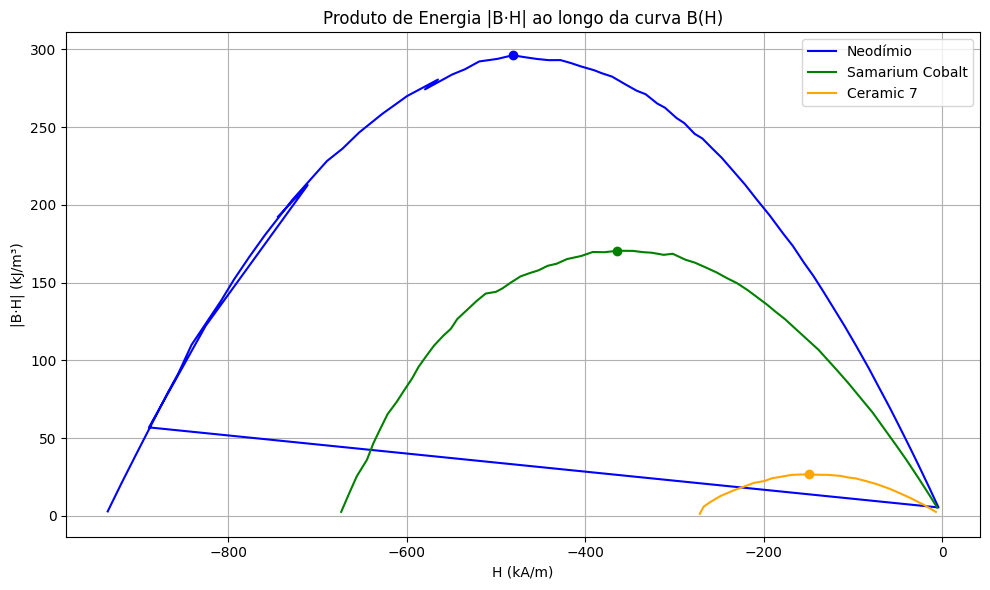

In [35]:
# Letra c
# Função para calcular BHmax
def max_energy_product(df):
    H = df["H_data"].values * 1e3   # kA/m → A/m
    B = df["B_data"].values  #T
    BH = np.abs(B * H)
    return np.max(BH), H, B, BH

# Calcular valores e preparar para plotagem
BHmax_neod, H_neod, B_neod, BH_neod = max_energy_product(df_neod)
BHmax_sam, H_sam, B_sam, BH_sam = max_energy_product(df_samarium)
BHmax_cer, H_cer, B_cer, BH_cer = max_energy_product(df_ceramic)

# Impressão dos máximos
print("Neodímio      BHmax = {:.1f} kJ/m³".format(BHmax_neod / 1e3))
print("Samarium      BHmax = {:.1f} kJ/m³".format(BHmax_sam / 1e3))
print("Ceramic 7     BHmax = {:.1f} kJ/m³".format(BHmax_cer / 1e3))

# Plotando os BH de cada material
plt.figure(figsize=(10, 6))
plt.plot(H_neod / 1e3, BH_neod / 1e3, label="Neodímio", color="blue")
plt.plot(H_sam / 1e3, BH_sam / 1e3, label="Samarium Cobalt", color="green")
plt.plot(H_cer / 1e3, BH_cer / 1e3, label="Ceramic 7", color="orange")

# Destacar máximos
plt.plot(H_neod[np.argmax(BH_neod)] / 1e3, BHmax_neod / 1e3, 'o', color="blue")
plt.plot(H_sam[np.argmax(BH_sam)] / 1e3, BHmax_sam / 1e3, 'o', color="green")
plt.plot(H_cer[np.argmax(BH_cer)] / 1e3, BHmax_cer / 1e3, 'o', color="orange")

plt.xlabel("H (kA/m)")
plt.ylabel("|B·H| (kJ/m³)")
plt.title("Produto de Energia |B·H| ao longo da curva B(H)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
